In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [13]:
arma_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\orange_juice\ICEUS_DLY_OJ1!, 1D.csv',index_col='time', parse_dates=True)

In [14]:
arma_df.head(10)

,open,high,low,close,Commercials long,Commercials short,Commercials net,Large Speculators long,Large Speculators short,Large Speculators net,...,OI,Commercials long.1,Commercials short.1,Commercials net.1,Large Speculators long.1,Large Speculators short.1,Large Speculators net.1,Small Speculators long.1,Small Speculators short.1,Small Speculators net.1
time,,,,,,,,,,,,,,,,,,,,,
1970-02-02 13:00:00+00:00,48.70,49.50,48.70,49.40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-03 13:00:00+00:00,52.15,52.40,51.25,52.40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-04 13:00:00+00:00,51.10,52.25,49.90,50.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-05 13:00:00+00:00,48.00,48.50,47.25,47.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-06 13:00:00+00:00,47.15,47.90,46.55,46.95,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-09 13:00:00+00:00,46.60,47.10,46.40,46.85,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-10 13:00:00+00:00,47.05,47.05,44.30,44.70,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-11 13:00:00+00:00,41.70,41.70,41.70,41.70,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-12 13:00:00+00:00,40.00,40.85,39.50,40.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(len(arma_df))

13271


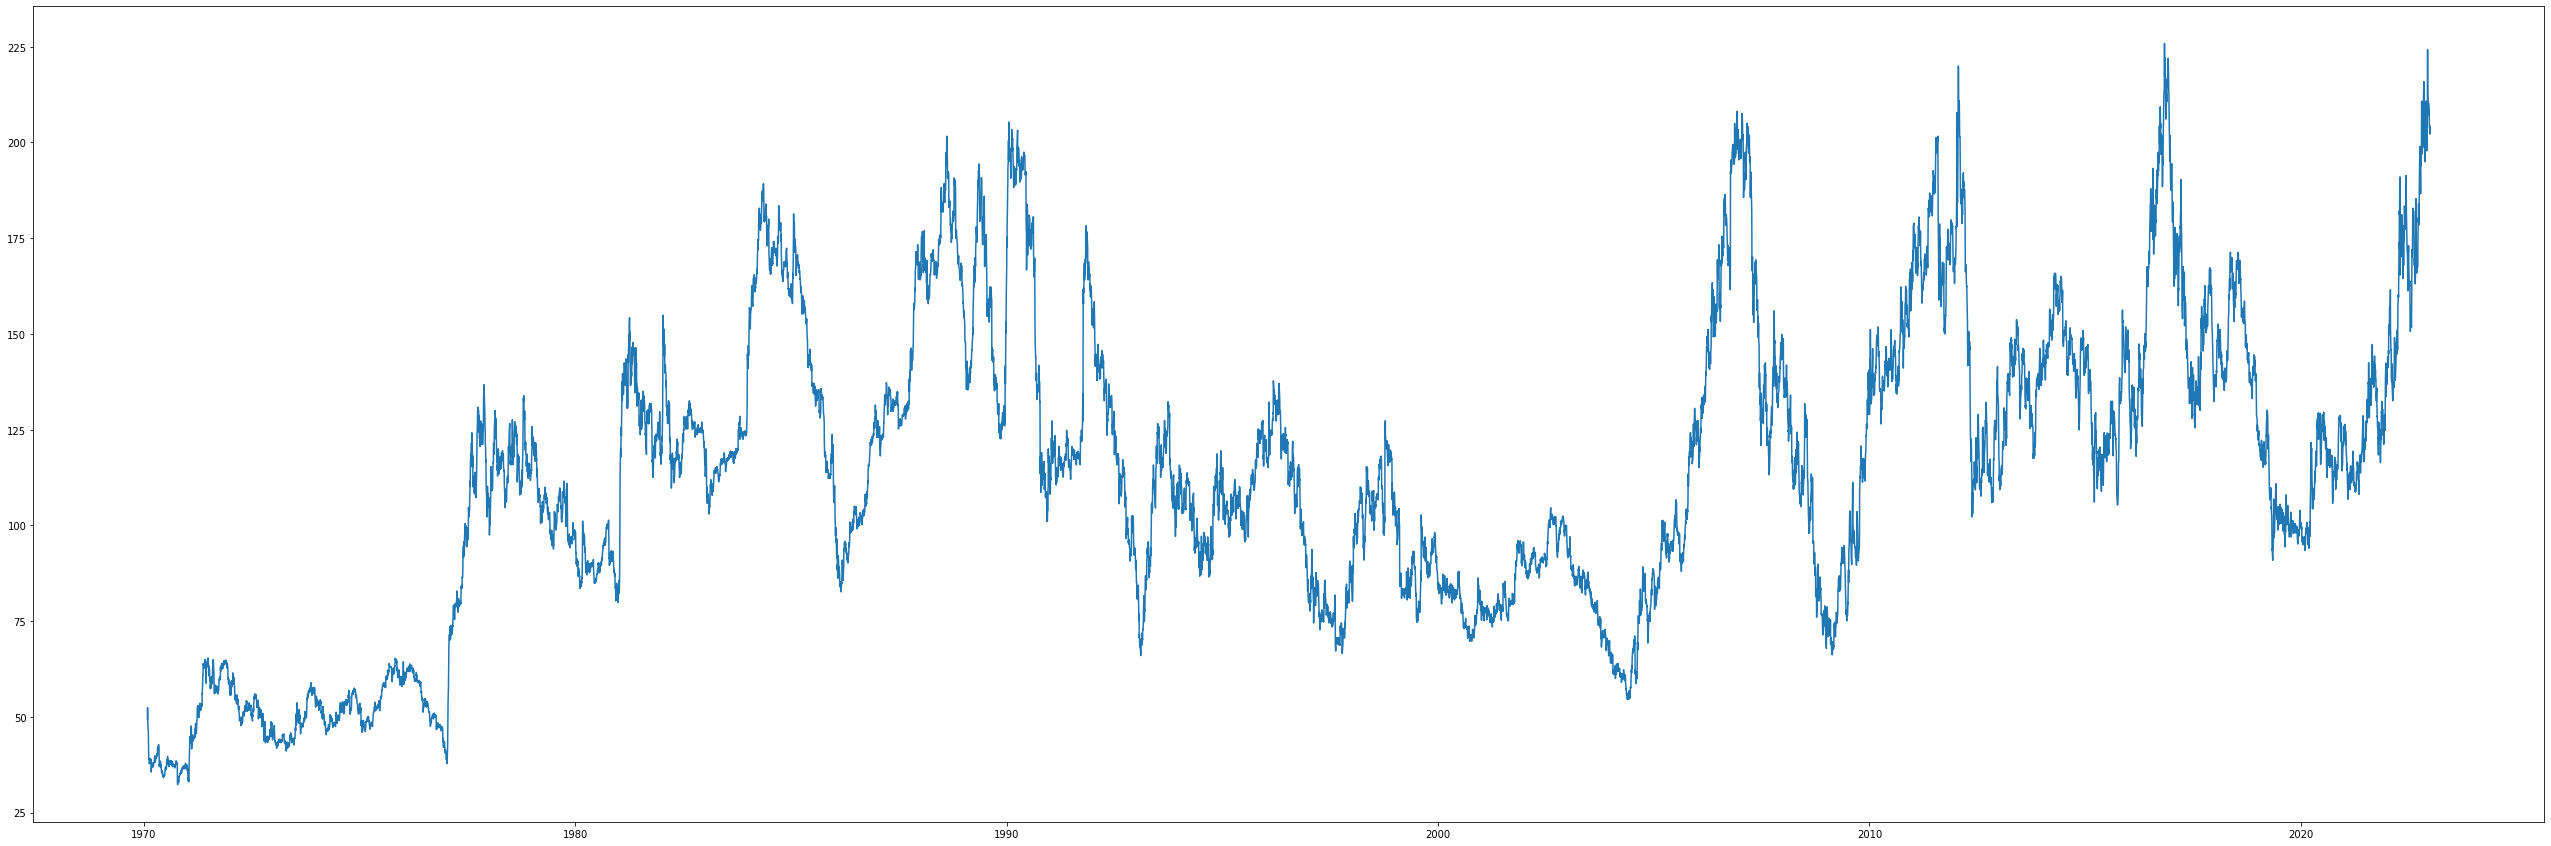

In [16]:
plt.figure(figsize=(45,15))
plt.plot(arma_df['close'])
plt.show()

In [17]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

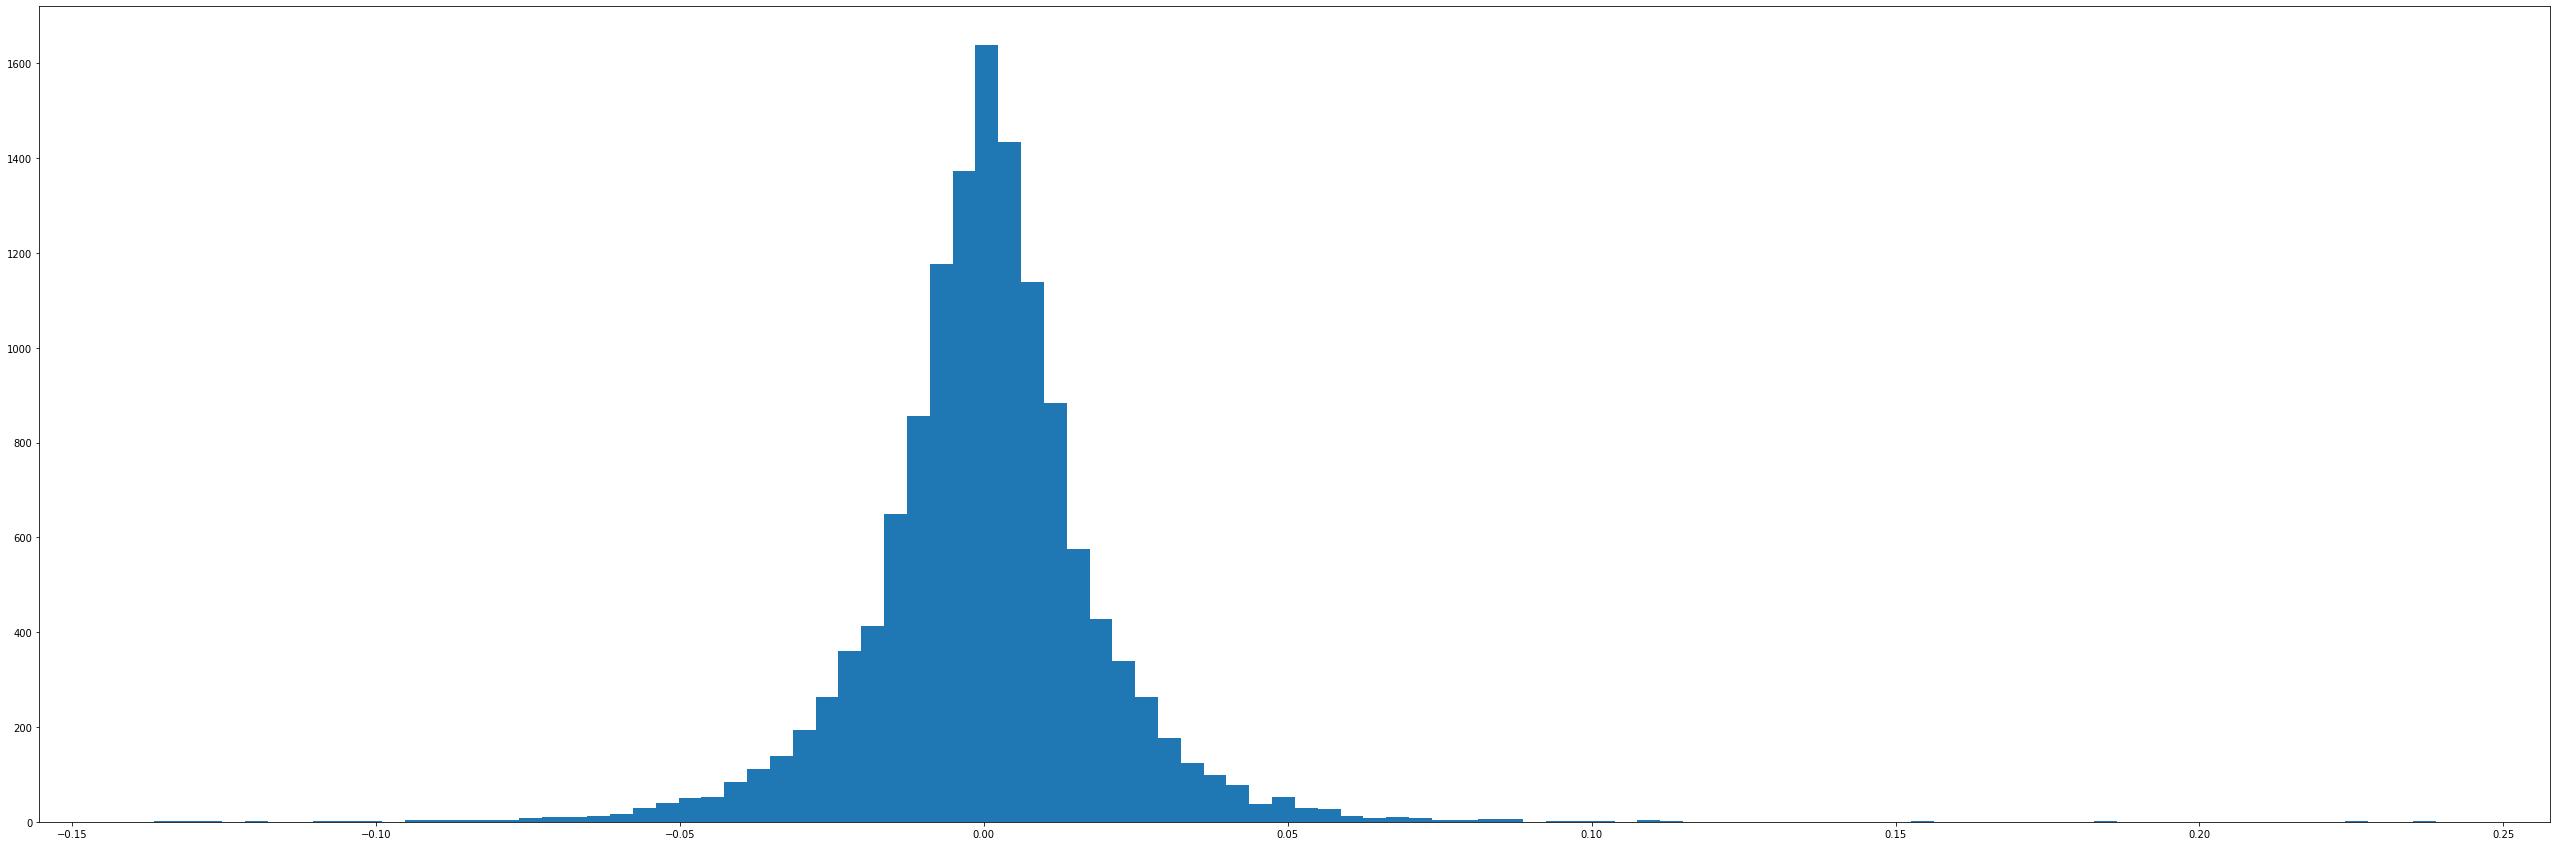

In [18]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

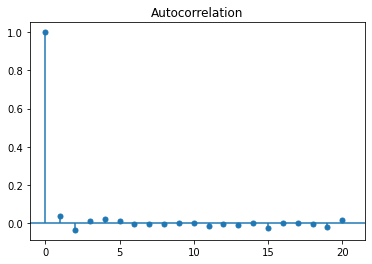

In [19]:
plot_acf(log_diff, alpha=1, lags=20).savefig("acf.jpg")

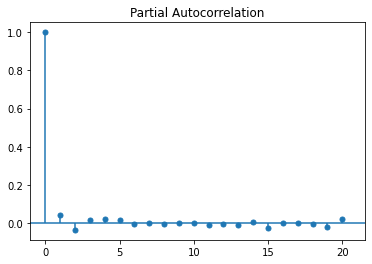

In [20]:
plot_pacf(log_diff, alpha=1, lags=20).savefig("pacf.jpg")